# Traveling Salesman Problem.

Consider Mr. Q. One of his life long dream is to travel to every American capital city(each State has one) **exactly once each**. 

He maps out the location each of the capital city (given in ``xy``). He may start at any city. His goal is to save travel cost. Lets assume travel cost from one city to the next is directly proportional to how far the two cities are $\sqrt{\Delta x^2 + \Delta y^2}$

Please find a route which help him save some his money while traveling through each city exacly once each.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
raw_data = """6734 1453
2233   10
5530 1424
 401  841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107  669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
 675 1006
7555 4819
7541 3981
3177  756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
  23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985  140
1916 1569
7280 4899
7509 3239
  10 2676
6807 2993
5185 3258
3023 1942""".strip()

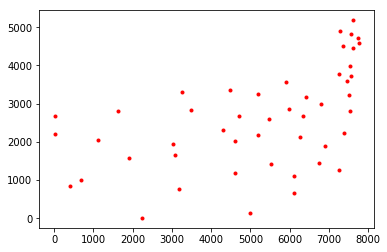

In [2]:
xy = np.array([[float(x) for x in line.split(' ') if x != ''] for line in raw_data.split('\n')])

plt.plot(xy[:,0], xy[:,1], '.r')

In [3]:
def initial_state():
    return np.array([[float(x) for x in line.split(' ') if x != ''] for line in raw_data.split('\n')])

In [4]:
def perturb(state):
    new_state = state.copy()
    index_1 = np.random.randint(len(new_state))
    index_2 = np.random.randint(len(new_state))
    a = new_state[index_1].copy()
    new_state[index_1] = new_state[index_2]
    new_state[index_2] = a
    return new_state

In [5]:
def evaluate(state):
    score = 0
    for position in range(len(state)-1):
        a = state[position+1]
        b = state[position]
        c = state[position]
        score += np.sqrt((state[position][0]-state[position+1][0])**2+(state[position][1]-state[position+1][0])**2)
    return score

In [6]:
def solver(n=3):
    state = initial_state().copy()
    best_score = evaluate(state)
    for i in range(n):
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if (new_score < best_score):
            state = new_state
            best_score = new_score
#         if i%1000 == 0:
#             print(i, best_score)
    return state, best_score

In [7]:
a, b = solver(30000);

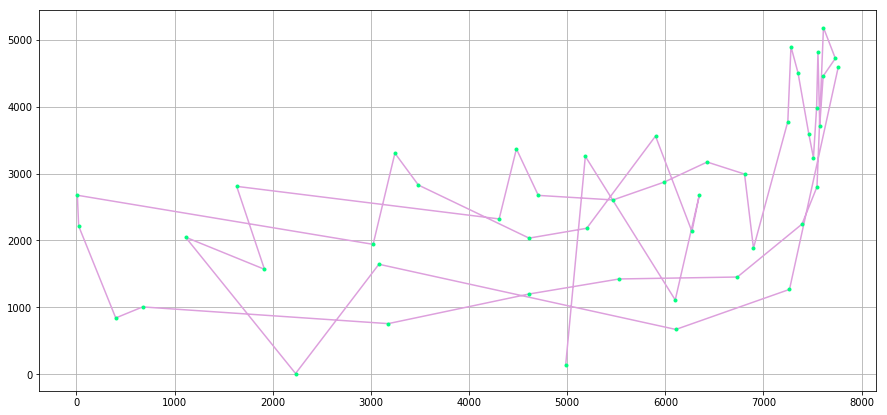

In [8]:
plt.figure(figsize = (15,7))
plt.plot(a[:,0], a[:,1], color='plum')
plt.plot(xy[:,0], xy[:,1], '.',color = 'springgreen')
plt.grid()

In [9]:
print(a)

[[7762. 4595.]
 [7265. 1268.]
 [6107.  669.]
 [3082. 1644.]
 [2233.   10.]
 [1112. 2049.]
 [1916. 1569.]
 [1633. 2809.]
 [4307. 2322.]
 [4483. 3369.]
 [4706. 2674.]
 [5468. 2606.]
 [5989. 2873.]
 [6426. 3173.]
 [6807. 2993.]
 [6898. 1885.]
 [7248. 3779.]
 [7280. 4899.]
 [7352. 4506.]
 [7462. 3590.]
 [7509. 3239.]
 [7541. 3981.]
 [7555. 4819.]
 [7573. 3716.]
 [7608. 4458.]
 [7732. 4723.]
 [7611. 5184.]
 [7545. 2801.]
 [7392. 2244.]
 [6734. 1453.]
 [5530. 1424.]
 [4608. 1198.]
 [3177.  756.]
 [ 675. 1006.]
 [ 401.  841.]
 [  23. 2216.]
 [  10. 2676.]
 [3023. 1942.]
 [3245. 3305.]
 [3484. 2829.]
 [4612. 2035.]
 [5199. 2182.]
 [5900. 3561.]
 [6271. 2135.]
 [6347. 2683.]
 [6101. 1110.]
 [5185. 3258.]
 [4985.  140.]]
